In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("metaverse_transactions_dataset_copy.csv")
df

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,anomaly
0,4/11/2022 12:47,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,low_risk
1,6/14/2022 19:12,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,low_risk
2,1/18/2022 16:26,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,low_risk
3,6/15/2022 9:20,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,low_risk
4,2/18/2022 14:35,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,moderate_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,2/13/2022 12:52,12,0xa99b9a7f5c5dd37429771efd3b93c6fbe1ab2936,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,660.280373,transfer,Africa,172.000,1,27,random,new,low_risk
78596,2/16/2022 16:15,16,0xcca095ad2d508c200bda1141f783d77c3e6cbb08,0xb71a4df291ea8e9996a74e77ab63f5abcbfe90f5,310.273397,purchase,Africa,172.000,5,60,focused,established,low_risk
78597,8/4/2022 16:06,16,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,624.674332,purchase,Africa,192.000,1,34,random,new,low_risk
78598,2/26/2022 4:06,4,0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155,0xd6ba299fdd52f09f01d9648036ca446498c01ac2,401.391592,purchase,Asia,192.168,4,56,focused,established,low_risk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  anomaly            78600 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 7.8+ MB


In [4]:
df.describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,11.532634,502.574903,147.644430,4.178702,69.684606
std,6.935897,245.898146,69.388143,2.366038,40.524476
min,0.000000,0.010000,10.000000,1.000000,20.000000
25%,6.000000,331.319966,172.000000,2.000000,35.000000
50%,12.000000,500.029500,172.160000,4.000000,60.000000
75%,18.000000,669.528311,192.000000,6.000000,100.000000
max,23.000000,1557.150905,192.168000,8.000000,159.000000


In [5]:
df.drop(columns=['timestamp','sending_address','receiving_address'],axis = 1,inplace = True)
df

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,anomaly
0,12,796.949206,transfer,Europe,192.000,3,48,focused,established,low_risk
1,19,0.010000,purchase,South America,172.000,5,61,focused,established,low_risk
2,16,778.197390,purchase,Asia,192.168,3,74,focused,established,low_risk
3,9,300.838358,transfer,South America,172.000,8,111,high_value,veteran,low_risk
4,14,775.569344,sale,Africa,172.160,6,100,high_value,veteran,moderate_risk
...,...,...,...,...,...,...,...,...,...,...
78595,12,660.280373,transfer,Africa,172.000,1,27,random,new,low_risk
78596,16,310.273397,purchase,Africa,172.000,5,60,focused,established,low_risk
78597,16,624.674332,purchase,Africa,192.000,1,34,random,new,low_risk
78598,4,401.391592,purchase,Asia,192.168,4,56,focused,established,low_risk


In [6]:
duplicated_rows = df[df.duplicated()]

# Display the duplicated rows
duplicated_rows

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,anomaly
33500,18,0.01,transfer,Europe,192.000,2,28,random,new,low_risk
43557,5,0.01,sale,Europe,192.168,1,23,random,new,low_risk
48467,8,0.01,purchase,North America,192.000,2,36,random,new,low_risk


In [7]:
# Remove all duplicated rows based on all columns
df = df.drop_duplicates()

# Display the first few rows of the cleaned dataset
print(df.head())

   hour_of_day      amount transaction_type location_region  ip_prefix  \
0           12  796.949206         transfer          Europe    192.000   
1           19    0.010000         purchase   South America    172.000   
2           16  778.197390         purchase            Asia    192.168   
3            9  300.838358         transfer   South America    172.000   
4           14  775.569344             sale          Africa    172.160   

   login_frequency  session_duration purchase_pattern    age_group  \
0                3                48          focused  established   
1                5                61          focused  established   
2                3                74          focused  established   
3                8               111       high_value      veteran   
4                6               100       high_value      veteran   

         anomaly  
0       low_risk  
1       low_risk  
2       low_risk  
3       low_risk  
4  moderate_risk  


In [8]:
duplicated_rows = df[df.duplicated()]

# Display the duplicated rows
duplicated_rows

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,anomaly


In [9]:
df.isnull().sum()

hour_of_day         0
amount              0
transaction_type    0
location_region     0
ip_prefix           0
login_frequency     0
session_duration    0
purchase_pattern    0
age_group           0
anomaly             0
dtype: int64

In [10]:
df['anomaly'].unique()

array(['low_risk', 'moderate_risk', 'high_risk'], dtype=object)

In [11]:
df['transaction_type'].unique()

array(['transfer', 'purchase', 'sale', 'phishing', 'scam'], dtype=object)

In [12]:
df['location_region'].unique()

array(['Europe', 'South America', 'Asia', 'Africa', 'North America'],
      dtype=object)

In [13]:
df['purchase_pattern'].unique()

array(['focused', 'high_value', 'random'], dtype=object)

In [14]:
df['age_group'].unique()

array(['established', 'veteran', 'new'], dtype=object)

In [15]:
# Create a mapping dictionary for all species
species_mapping = {'transfer': 0, 'purchase': 1, 'sale': 2, 'phishing' : 3,'scam' : 4}

# Apply the mapping to the 'species' column
df['transaction_type'] = df['transaction_type'].map(species_mapping)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14564\287387398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_type'] = df['transaction_type'].map(species_mapping)


In [16]:
# Create a mapping dictionary for all species
species_mapping = {'Europe': 0, 'South America': 1, 'Asia': 2, 'Africa' : 3,'North America' : 4}

# Apply the mapping to the 'species' column
df['location_region'] = df['location_region'].map(species_mapping)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14564\2367765859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location_region'] = df['location_region'].map(species_mapping)


In [17]:
# Create a mapping dictionary for all species
species_mapping = {'low_risk': 0, 'moderate_risk': 1, 'high_risk': 2}

# Apply the mapping to the 'species' column
df['anomaly'] = df['anomaly'].map(species_mapping)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14564\945950868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly'] = df['anomaly'].map(species_mapping)


In [18]:
# Create a mapping dictionary for all species
species_mapping = {'focused': 0, 'high_value': 1, 'random': 2}

# Apply the mapping to the 'species' column
df['purchase_pattern'] = df['purchase_pattern'].map(species_mapping)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14564\4149765761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purchase_pattern'] = df['purchase_pattern'].map(species_mapping)


In [19]:
# Create a mapping dictionary for all species
species_mapping = {'established': 0, 'veteran': 1, 'new': 2}

# Apply the mapping to the 'species' column
df['age_group'] = df['age_group'].map(species_mapping)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14564\227749466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = df['age_group'].map(species_mapping)


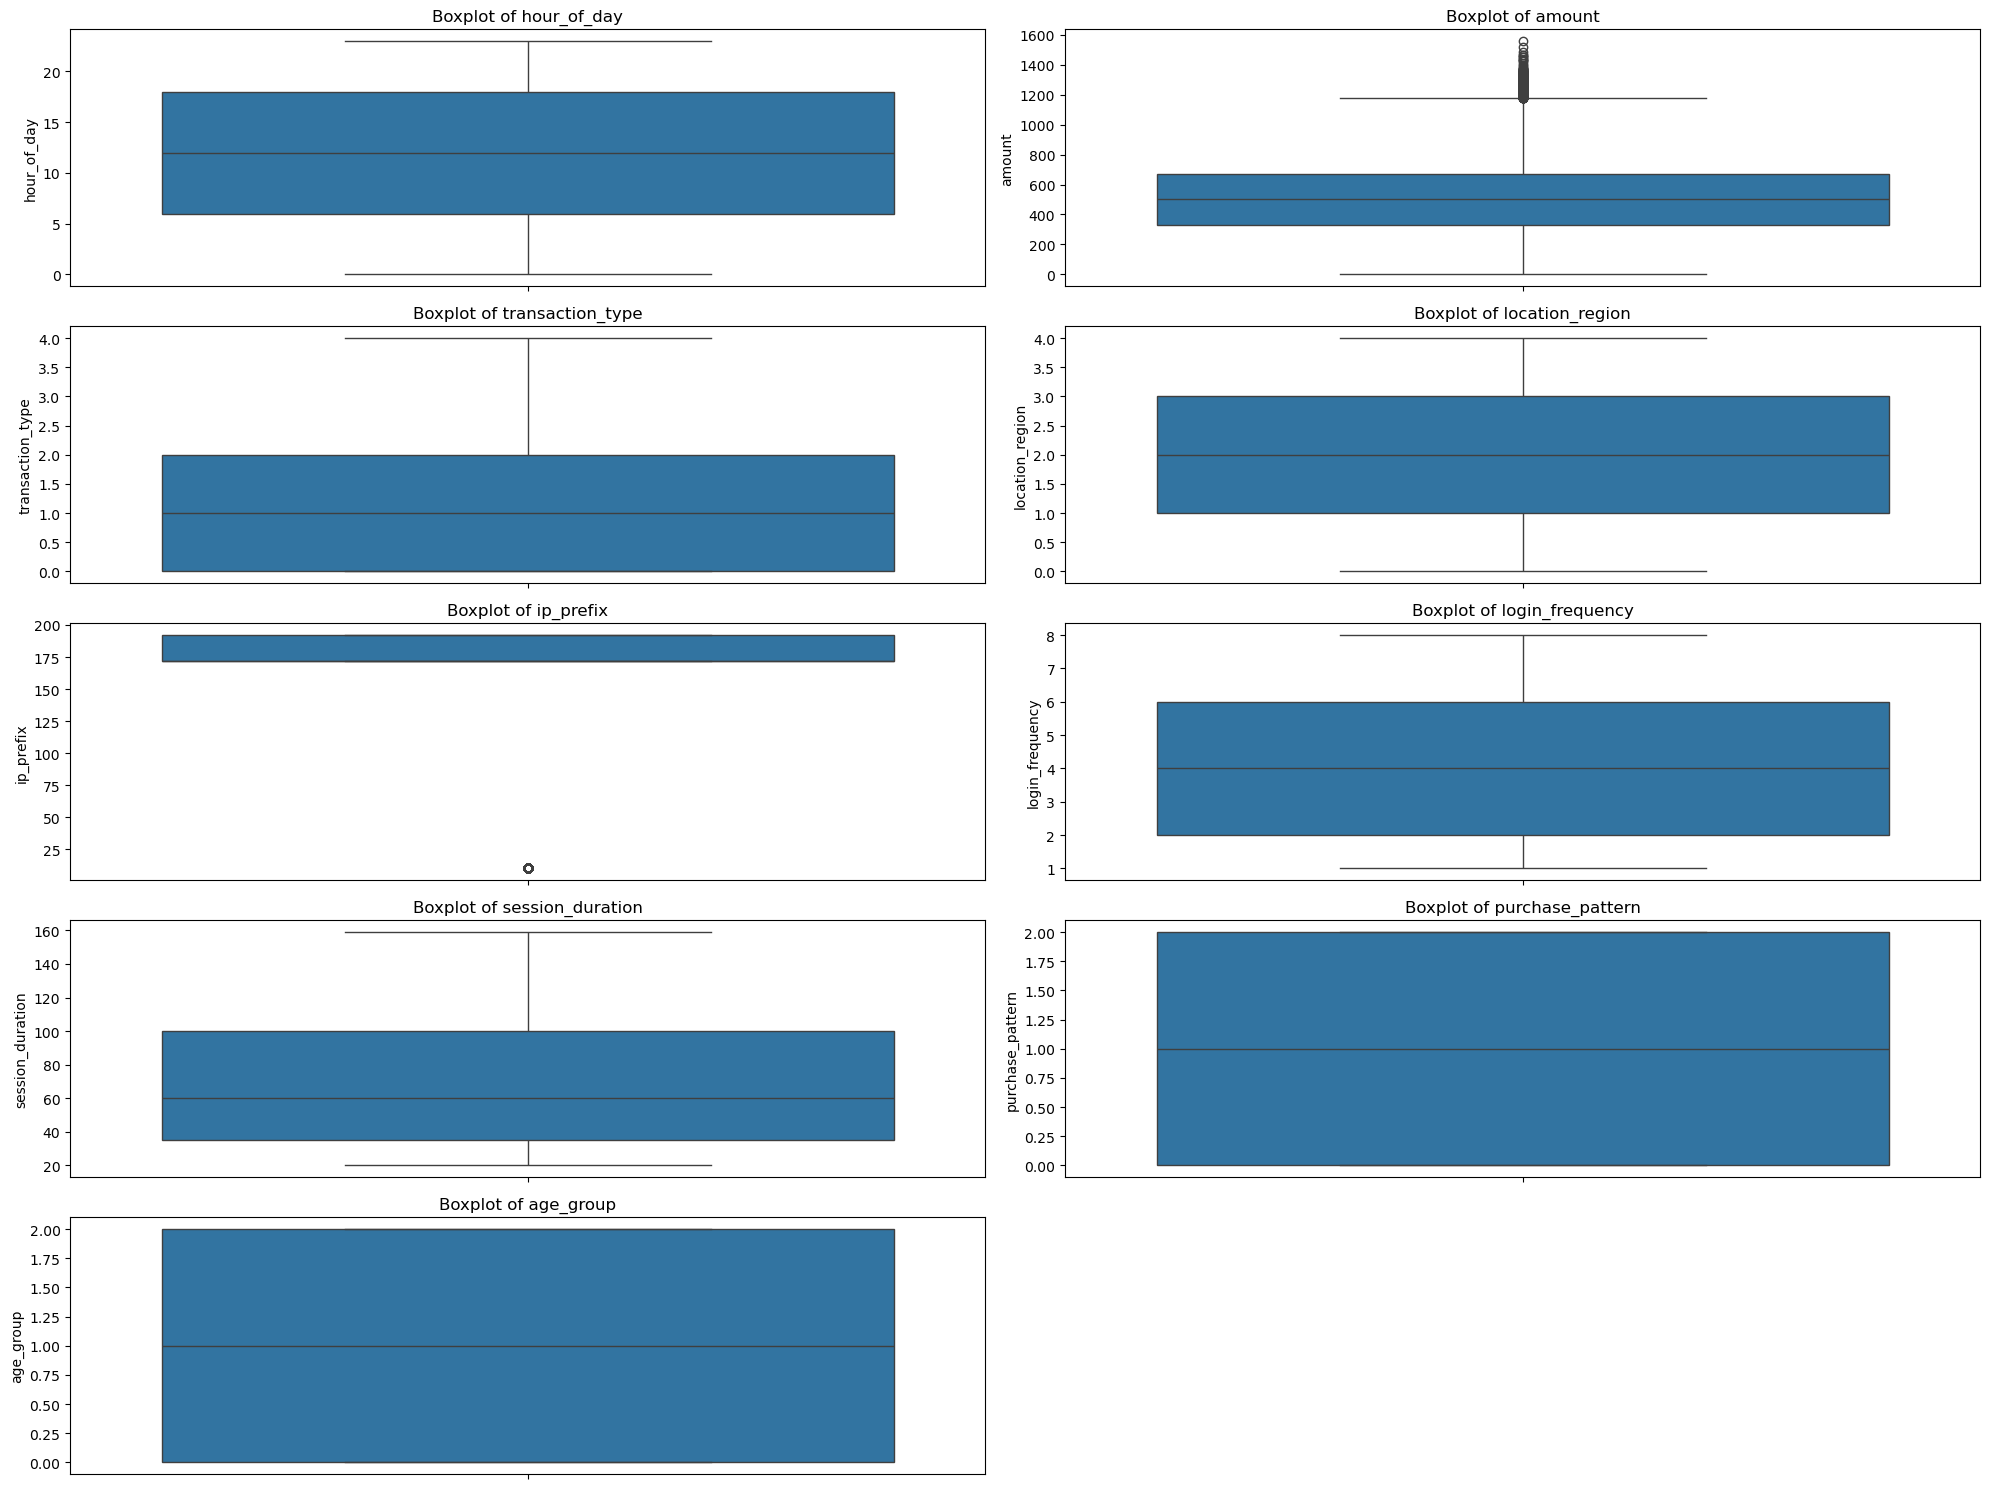

In [20]:
# Extract the first ten columns
X = df.iloc[:, :9]
plt.figure(figsize=(20, 15))

for i, column in enumerate(X.columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(y=X[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [21]:
columns_to_check = ['amount', 'ip_prefix']

# Calculate the first quartile (Q1) and third quartile (Q3) for specific columns
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
df = df.copy()
for column in columns_to_check:
    df = df[(df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column])]

# Display the filtered dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 62651 entries, 0 to 78599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour_of_day       62651 non-null  int64  
 1   amount            62651 non-null  float64
 2   transaction_type  62651 non-null  int64  
 3   location_region   62651 non-null  int64  
 4   ip_prefix         62651 non-null  float64
 5   login_frequency   62651 non-null  int64  
 6   session_duration  62651 non-null  int64  
 7   purchase_pattern  62651 non-null  int64  
 8   age_group         62651 non-null  int64  
 9   anomaly           62651 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 5.3 MB
None
   hour_of_day      amount  transaction_type  location_region  ip_prefix  \
0           12  796.949206                 0                0    192.000   
1           19    0.010000                 1                1    172.000   
2           16  778.197390                 1     

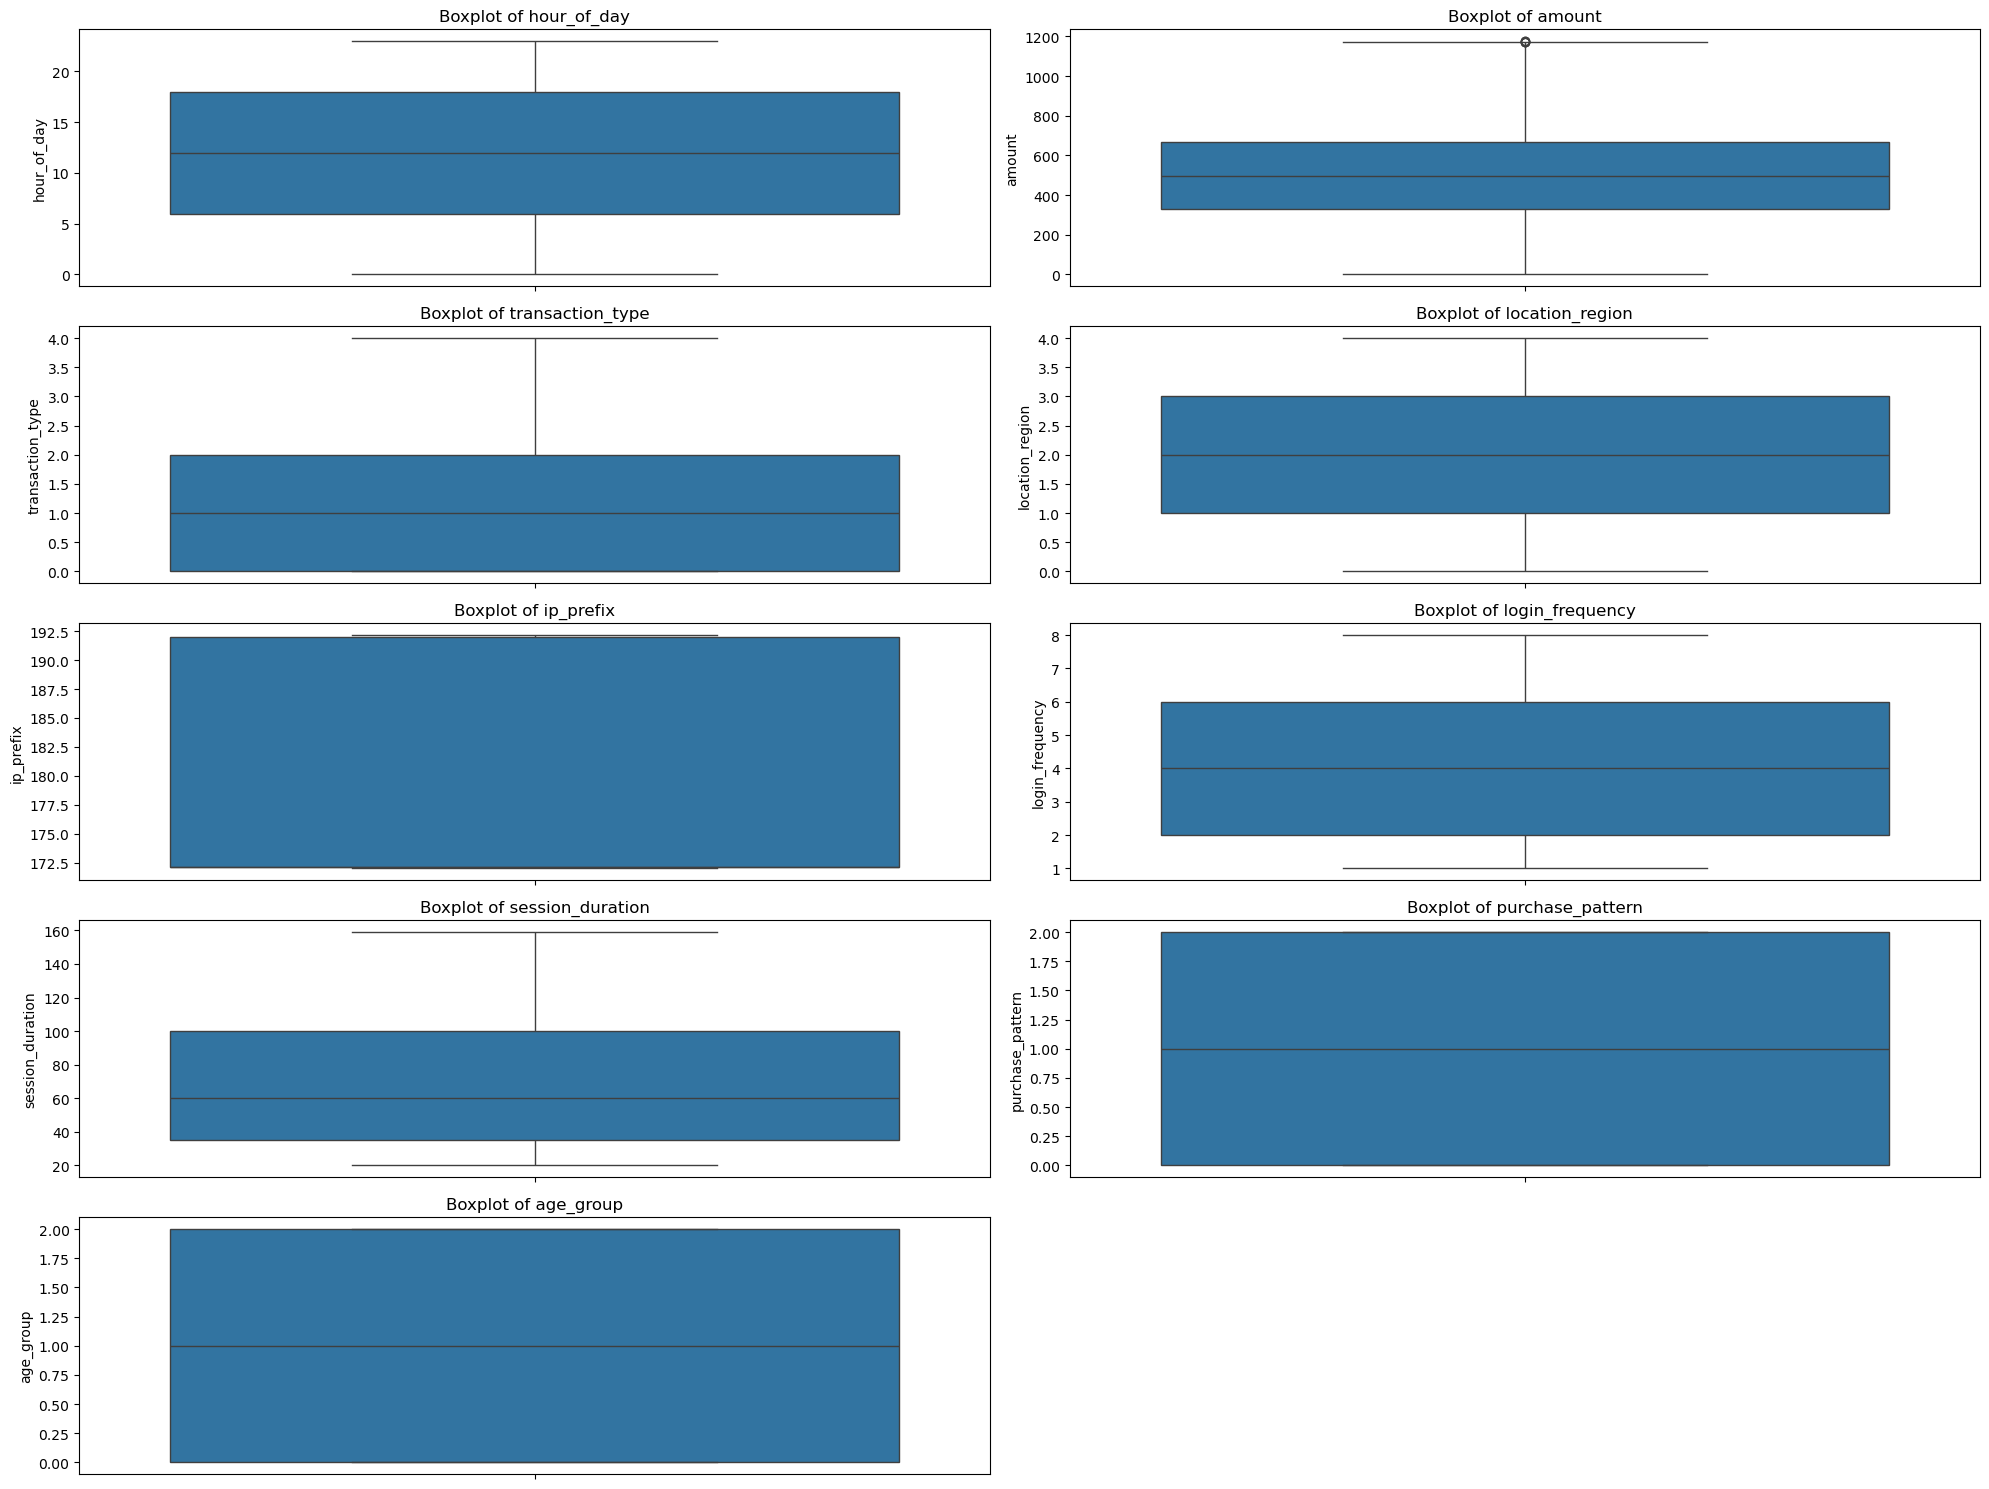

In [22]:
# Extract the first ten columns
X = df.iloc[:, 0:9]
plt.figure(figsize=(20, 15))

for i, column in enumerate(X.columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(y=X[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [23]:
df.isnull().sum()

hour_of_day         0
amount              0
transaction_type    0
location_region     0
ip_prefix           0
login_frequency     0
session_duration    0
purchase_pattern    0
age_group           0
anomaly             0
dtype: int64

In [24]:
# Define the feature matrix X and target vector Y
X = df.iloc[:, 0:9]  
Y = df["anomaly"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [25]:
 # Standardize the feature matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
 # Initialize and train the logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)


LogisticRegression()

In [27]:
  # Predict on the test set
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming `classifier` is already defined and fitted
y_pred = classifier.predict(X_test)

accuracy_LR = accuracy_score(Y_test, y_pred)
precision_LR = precision_score(Y_test, y_pred, average='micro')  
recall_LR = recall_score(Y_test, y_pred, average='micro')
f1_LR = f1_score(Y_test, y_pred, average='micro')

print("ACCURACY SCORE : ", accuracy_LR)
print("PRECISION SCORE : ", precision_LR)
print("RECALL SCORE : ", recall_LR)
print("F1 SCORE : ", f1_LR)
print(classification_report(Y_test, y_pred))


ACCURACY SCORE :  0.9550533103492307
PRECISION SCORE :  0.9550533103492307
RECALL SCORE :  0.9550533103492307
F1 SCORE :  0.9550533103492307
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     12629
           1       0.81      0.77      0.79      1709
           2       1.00      1.00      1.00      1325

    accuracy                           0.96     15663
   macro avg       0.93      0.92      0.92     15663
weighted avg       0.95      0.96      0.95     15663



In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
treemodel = DecisionTreeClassifier(max_depth = 2)
treemodel

DecisionTreeClassifier(max_depth=2)

In [31]:
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.6, 0.8333333333333334, 'x[2] <= 1.175\ngini = 0.329\nsamples = 46988\nvalue = [37958, 5114, 3916]'),
 Text(0.4, 0.5, 'x[2] <= 0.232\ngini = 0.209\nsamples = 43072\nvalue = [37958, 5114, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 28110\nvalue = [28110, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.45\nsamples = 14962\nvalue = [9848, 5114, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3916\nvalue = [0, 0, 3916]')]

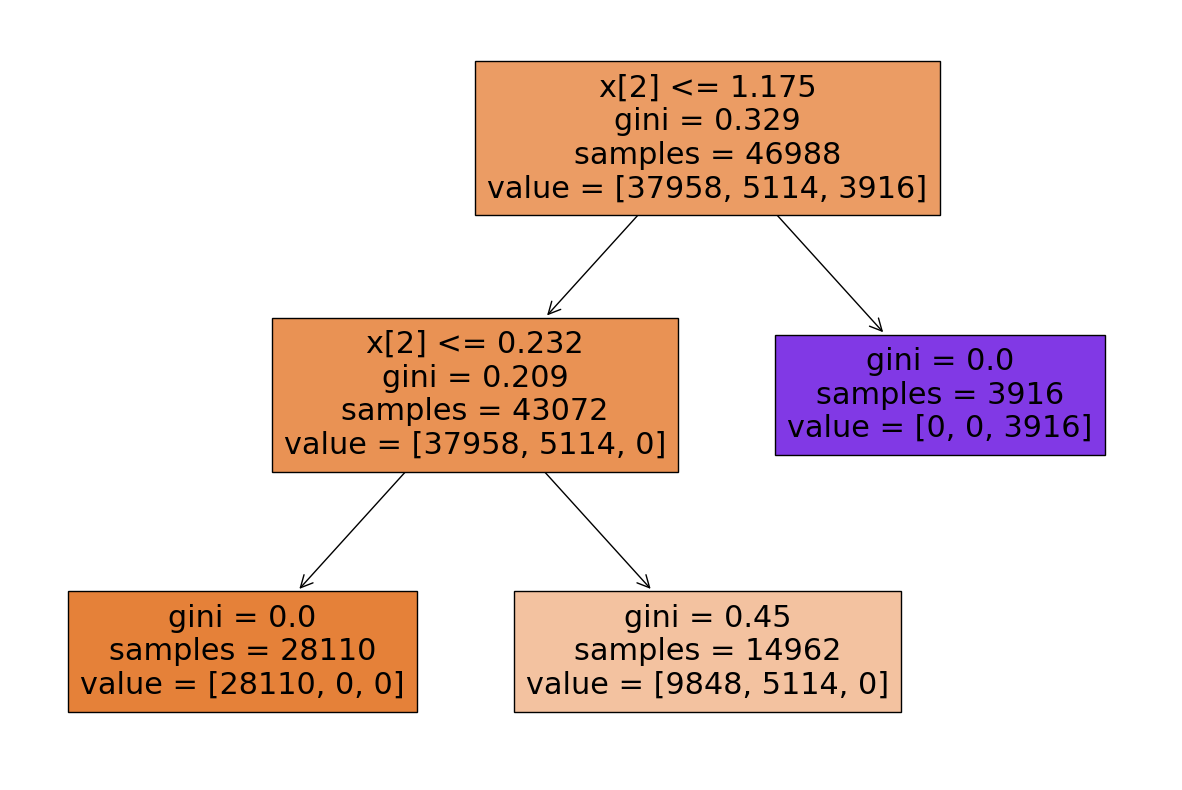

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize = (15,10))
tree.plot_tree(treemodel,filled = True)

In [33]:
treemodel = DecisionTreeClassifier()
treemodel

DecisionTreeClassifier()

In [34]:
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[2] <= 1.175\ngini = 0.329\nsamples = 46988\nvalue = [37958, 5114, 3916]'),
 Text(0.4, 0.75, 'x[2] <= 0.232\ngini = 0.209\nsamples = 43072\nvalue = [37958, 5114, 0]'),
 Text(0.3, 0.5833333333333334, 'gini = 0.0\nsamples = 28110\nvalue = [28110, 0, 0]'),
 Text(0.5, 0.5833333333333334, 'x[0] <= -0.728\ngini = 0.45\nsamples = 14962\nvalue = [9848, 5114, 0]'),
 Text(0.3, 0.4166666666666667, 'x[5] <= -0.078\ngini = 0.329\nsamples = 4280\nvalue = [889, 3391, 0]'),
 Text(0.2, 0.25, 'x[1] <= 0.826\ngini = 0.334\nsamples = 1128\nvalue = [889.0, 239.0, 0.0]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 889\nvalue = [889, 0, 0]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 239\nvalue = [0, 239, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3152\nvalue = [0, 3152, 0]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 0.825\ngini = 0.271\nsamples = 10682\nvalue = [8959, 1723, 0]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 8369\nvalue = [8369, 0, 0]'),

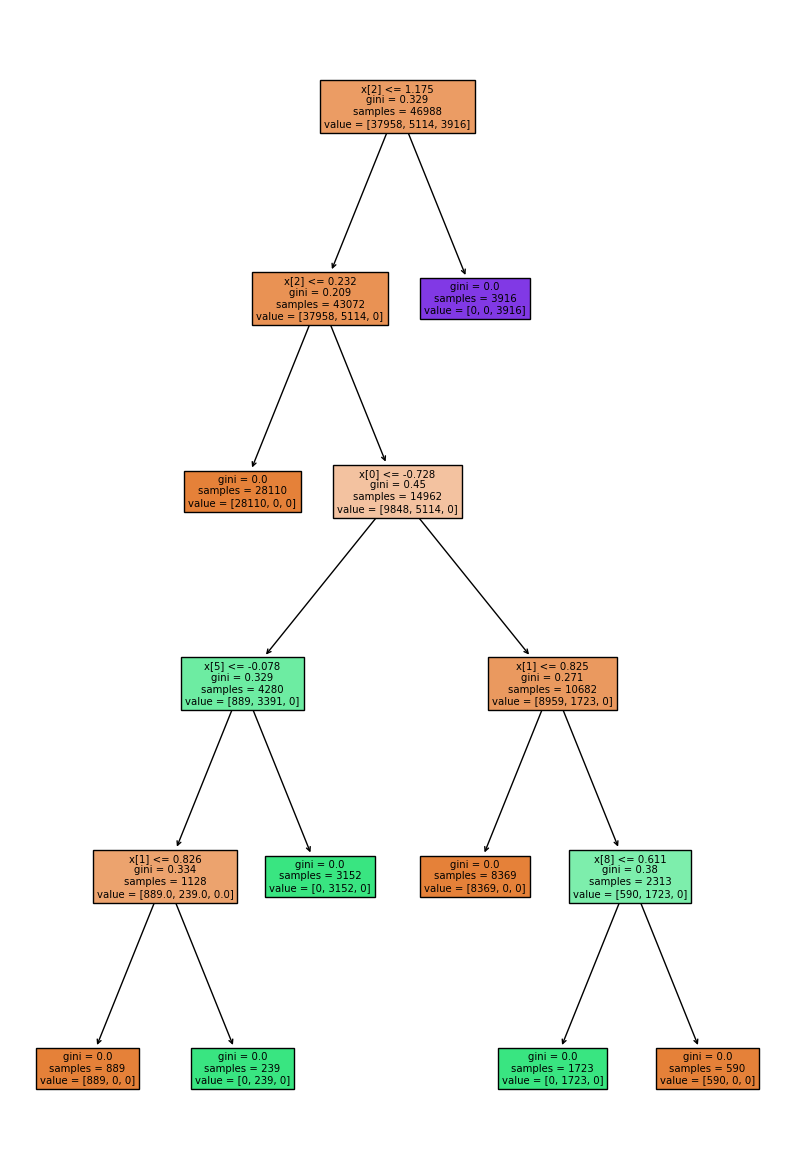

In [35]:
from sklearn import tree
plt.figure(figsize = (10,15))
tree.plot_tree(treemodel,filled = True)

In [36]:
y_pred1 = treemodel.predict(X_test)
y_pred1

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score,classification_report 

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_DT = accuracy_score(Y_test,y_pred1)
precision_DT = precision_score(Y_test,y_pred1,average='micro')
recall_DT = recall_score(Y_test,y_pred1,average='micro')
f1_DT = f1_score(Y_test,y_pred1,average='micro')
print("ACCURACY SCORE : ", accuracy_DT)
print(classification_report(Y_test,y_pred1))

ACCURACY SCORE :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12629
           1       1.00      1.00      1.00      1709
           2       1.00      1.00      1.00      1325

    accuracy                           1.00     15663
   macro avg       1.00      1.00      1.00     15663
weighted avg       1.00      1.00      1.00     15663



In [39]:
from sklearn.ensemble import RandomForestClassifier
forestmodel = RandomForestClassifier()
forestmodel

RandomForestClassifier()

In [40]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train the model
forestmodel.fit(X_train, Y_train)

# Make predictions
y_pred_rf = forestmodel.predict(X_test)

# Calculate performance metrics
accuracy_RF = accuracy_score(Y_test, y_pred_rf)
precision_RF = precision_score(Y_test, y_pred_rf, average='weighted')
recall_RF = recall_score(Y_test, y_pred_rf, average='weighted')
f1_RF = f1_score(Y_test, y_pred_rf, average='weighted')

conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
class_report_rf = classification_report(Y_test, y_pred_rf)

# Print the performance metrics for Random Forest
print('Random Forest Metrics:')
print('Accuracy:',accuracy_RF)
print('Precision:',precision_RF)
print('Recall:',recall_RF)
print('F1-Score:',f1_RF)
print('Confusion Matrix:\n',conf_matrix_rf)
print('Classification Report: \n', class_report_rf)


Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[12629     0     0]
 [    0  1709     0]
 [    0     0  1325]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12629
           1       1.00      1.00      1.00      1709
           2       1.00      1.00      1.00      1325

    accuracy                           1.00     15663
   macro avg       1.00      1.00      1.00     15663
weighted avg       1.00      1.00      1.00     15663



In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 3)

In [42]:
knn.fit(X_train,Y_train)
y_predknn = knn.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_predknn = knn.predict(X_test)
nvb_accuracy = accuracy_score(Y_test,y_predknn)
nvb_precision = precision_score(Y_test,y_predknn,average='micro')
nvb_recall = recall_score(Y_test,y_predknn,average='micro')
nvb_f1 = f1_score(Y_test,y_predknn,average='micro')
print("ACCURACY SCORE : ", nvb_accuracy)
print(classification_report(Y_test,y_pred))

ACCURACY SCORE :  0.9891463959650131
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     12629
           1       0.81      0.77      0.79      1709
           2       1.00      1.00      1.00      1325

    accuracy                           0.96     15663
   macro avg       0.93      0.92      0.92     15663
weighted avg       0.95      0.96      0.95     15663



In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#fitting-
gnb.fit(X_train, Y_train)
#predicting
y_pred2=gnb.predict(X_test)

In [45]:
#importing libraries
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

#scores
acc_score_gnb = accuracy_score(y_pred2, Y_test)
recall_scr_gnb = recall_score(y_pred2, Y_test, average='weighted')
pre_scr_gnb = precision_score(y_pred2, Y_test, average='weighted')
f1_scr_gnb = f1_score(y_pred, Y_test, average='weighted')
class_report = classification_report(y_pred2, Y_test)

print('Accuracy score is:\n', acc_score_gnb, '\n')
print('Recall score is:\n', recall_scr_gnb, '\n')
print('Precision score is:\n', pre_scr_gnb, '\n')
print('F1 score is:\n', f1_scr_gnb, '\n')
print('Classification report is:\n', class_report)


Accuracy score is:
 0.7076549830811466 

Recall score is:
 0.7076549830811466 

Precision score is:
 0.8050067807108925 

F1 score is:
 0.955496955585846 

Classification report is:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      8123
           1       0.96      0.45      0.61      3650
           2       1.00      0.34      0.51      3890

    accuracy                           0.71     15663
   macro avg       0.87      0.60      0.63     15663
weighted avg       0.81      0.71      0.67     15663



In [46]:
forestmodel.predict(scaler.transform([[14,523.947956,1,2,192.168,4,56,0,0]]))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [47]:
treemodel.predict(scaler.transform([[14,523.947956,1,2,192.168,4,56,0,0]]))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [48]:
classifier.predict(scaler.transform([[14,523.947956,1,2,192.168,4,56,0,0]]))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [49]:
gnb.predict(scaler.transform([[14,523.947956,1,2,192.168,4,56,0,0]]))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [50]:
knn.predict(scaler.transform([[14,523.947956,1,2,192.168,4,56,0,0]]))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Support Vector Classifier
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)

# Make predictions
y_predsvc = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_predsvc)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [52]:

comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'GaussianNB', 'SVC'],
    'Accuracy': [accuracy_LR, accuracy_DT, accuracy_RF, nvb_accuracy, acc_score_gnb, accuracy]
})

# Round accuracy values to 2 decimal places
comparison_table['Accuracy'] = comparison_table['Accuracy'].round(2)

print(comparison_table)

                 Model  Accuracy
0  Logistic Regression      0.96
1        Decision Tree      1.00
2        Random Forest      1.00
3                  KNN      0.99
4           GaussianNB      0.71
5                  SVC      0.95


In [53]:
prediction_table = pd.DataFrame({
    'True Value': Y_test,
    'Logistic Regression Prediction': y_pred,
    'Decision Tree Prediction': y_pred1,
    'Random Forest Prediction': y_pred_rf,
    'K-Neighbor': y_predknn,
    'GausianNB': y_pred2,
    'SVC':y_predsvc
})
print(prediction_table)

       True Value  Logistic Regression Prediction  Decision Tree Prediction  \
16046           0                               0                         0   
1082            0                               0                         0   
17170           1                               0                         1   
31712           0                               0                         0   
58738           1                               1                         1   
...           ...                             ...                       ...   
29590           0                               0                         0   
66745           1                               1                         1   
75558           0                               0                         0   
6549            1                               0                         1   
35596           0                               0                         0   

       Random Forest Prediction  K-Neighbor  Gausia

In [54]:
import pandas as pd

# Define the model scores
model_scores = {
    'Model': ['Multiple Linear Regression', 'Decision Tree Regression', 'Random Forest Regression','KNN','Naive Bayes','Support Vector Classifier'],
    'Accuracy (%)': [0.96, 1.0,1.0,0.99,0.71,0.95],
    'Predicted Value': [[1], [1], [1], [1], [1],[1]],
}

# Create a DataFrame
scores_df = pd.DataFrame(model_scores)
from IPython.display import display
display(scores_df.style.set_caption("Comparison of Classification Model Pridictions").set_table_styles(
    [{'selector': 'caption', 'props': [('text-align', 'center'), ('font-size', '16px'), ('font-weight', 'bold')]}]
))

,Model,Accuracy (%),Predicted Value
0,Multiple Linear Regression,0.960000,[1]
1,Decision Tree Regression,1.000000,[1]
2,Random Forest Regression,1.000000,[1]
3,KNN,0.990000,[1]
4,Naive Bayes,0.710000,[1]
5,Support Vector Classifier,0.950000,[1]


In [55]:
df

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,anomaly
0,12,796.949206,0,0,192.000,3,48,0,0,0
1,19,0.010000,1,1,172.000,5,61,0,0,0
2,16,778.197390,1,2,192.168,3,74,0,0,0
3,9,300.838358,0,1,172.000,8,111,1,1,0
4,14,775.569344,2,3,172.160,6,100,1,1,1
...,...,...,...,...,...,...,...,...,...,...
78595,12,660.280373,0,3,172.000,1,27,2,2,0
78596,16,310.273397,1,3,172.000,5,60,0,0,0
78597,16,624.674332,1,3,192.000,1,34,2,2,0
78598,4,401.391592,1,2,192.168,4,56,0,0,0


In [56]:
clf.predict(scaler.transform([[14,523.947956,0,4,192.168,4,56,0,0]]))

array([1], dtype=int64)

Skewness of hour_of_day: -0.003591100864402558


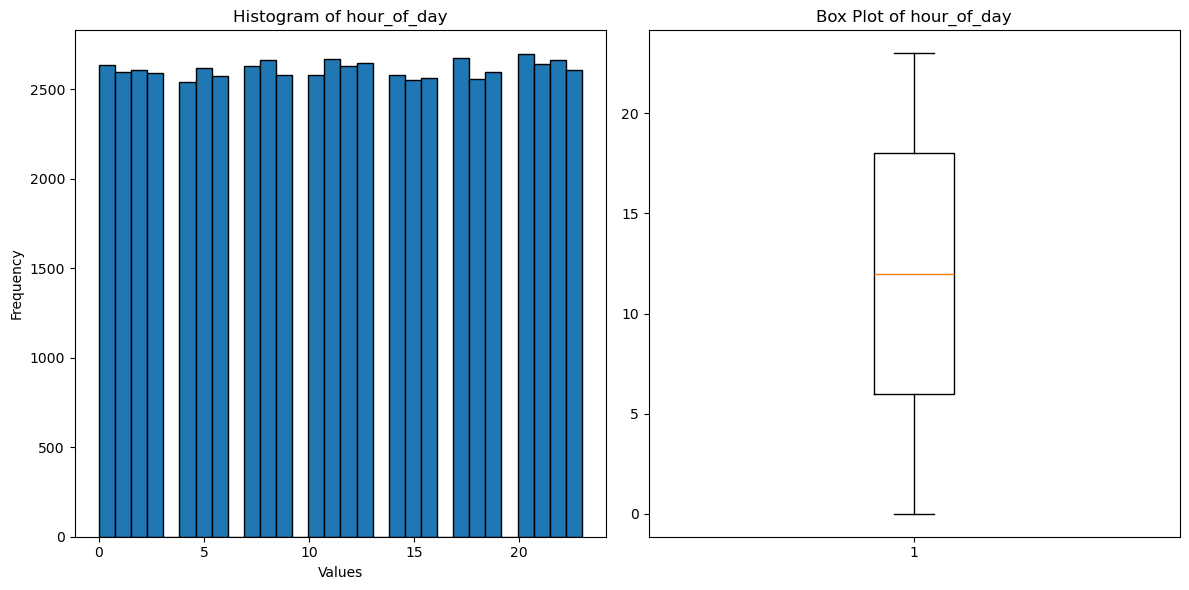

Skewness of amount: 0.055583634765408


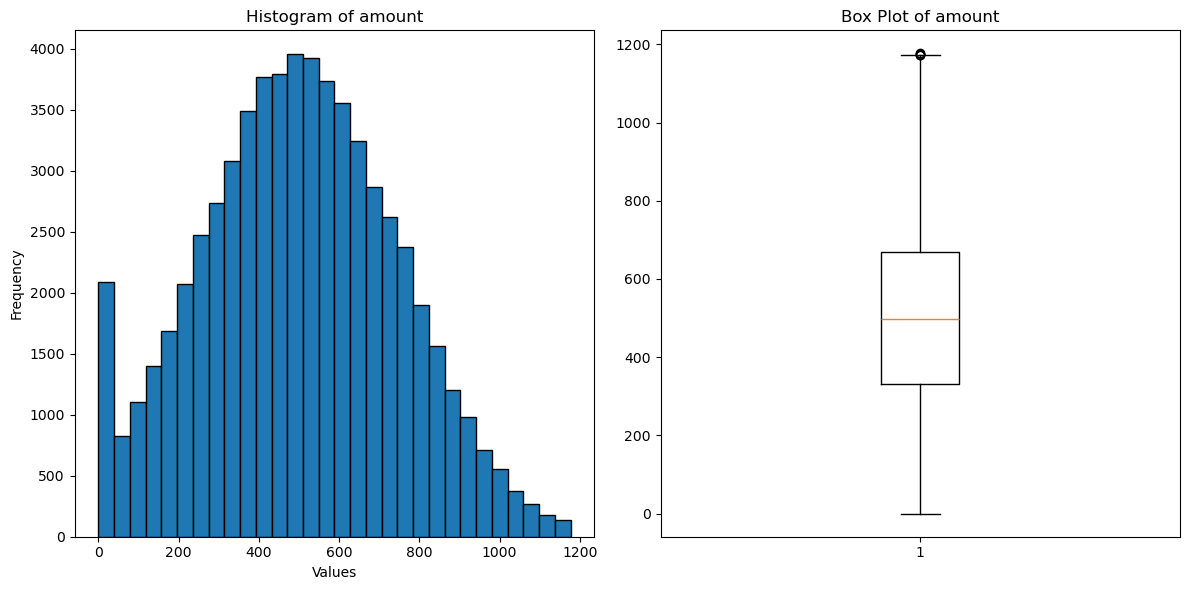

Skewness of transaction_type: 0.6706620929681991


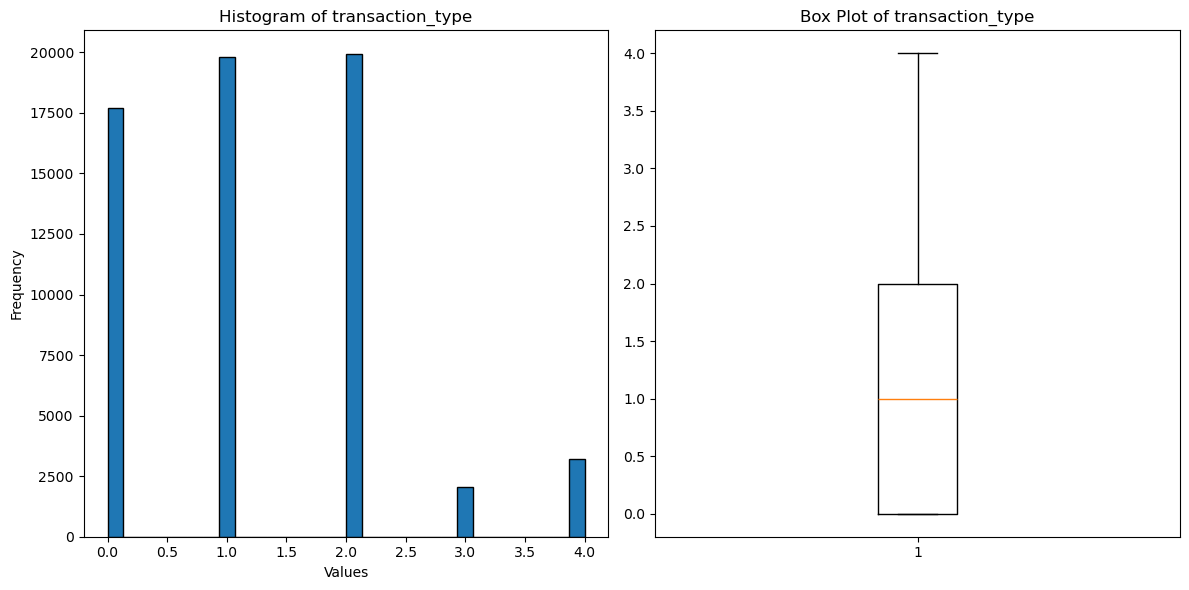

Skewness of location_region: -0.003322153766039555


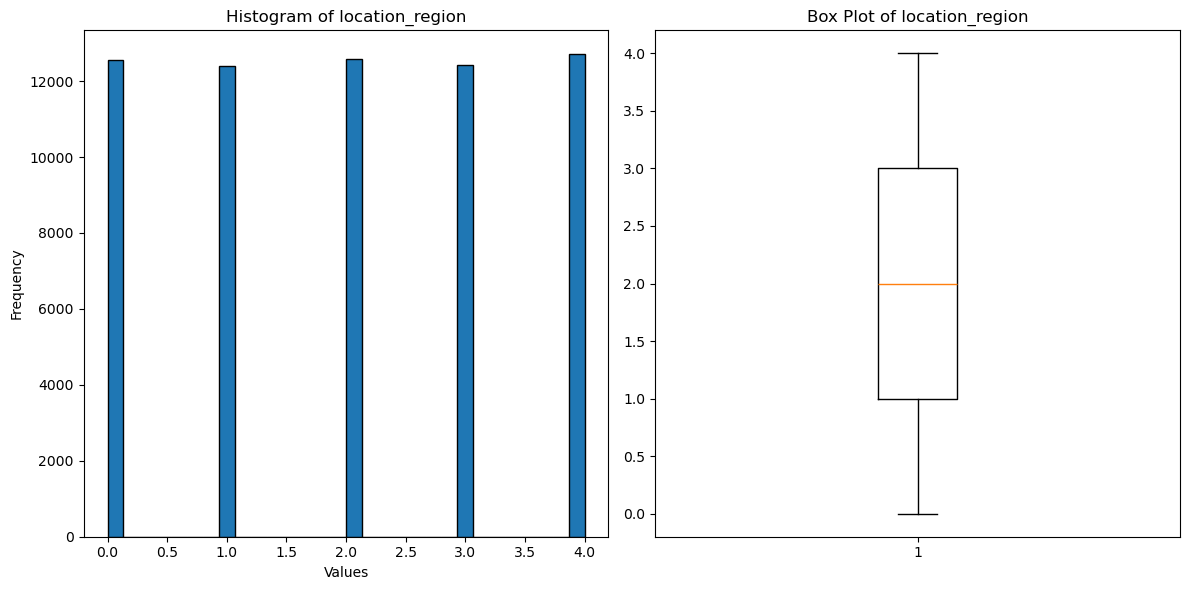

Skewness of ip_prefix: 0.008085573949147272


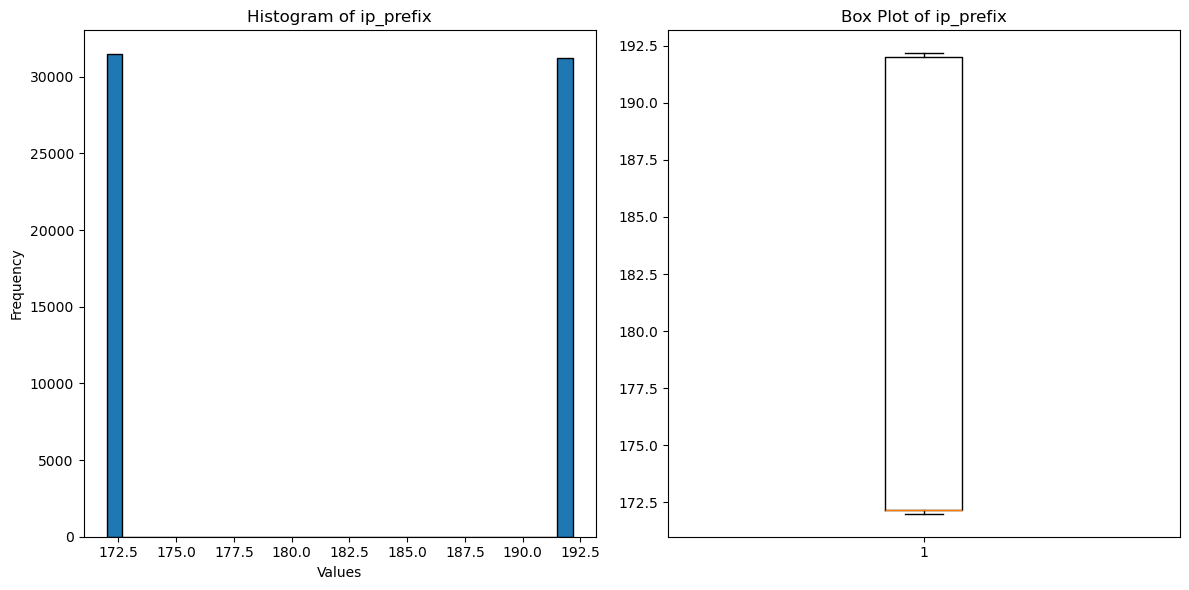

Skewness of login_frequency: 0.17372862654464502


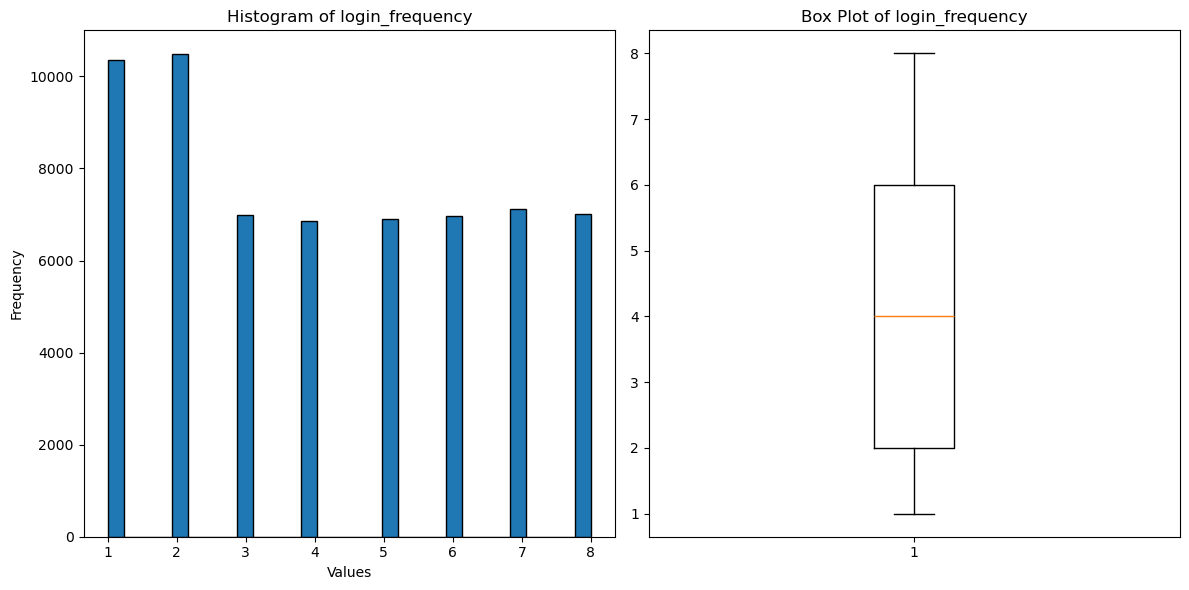

Skewness of session_duration: 0.6593990611381911


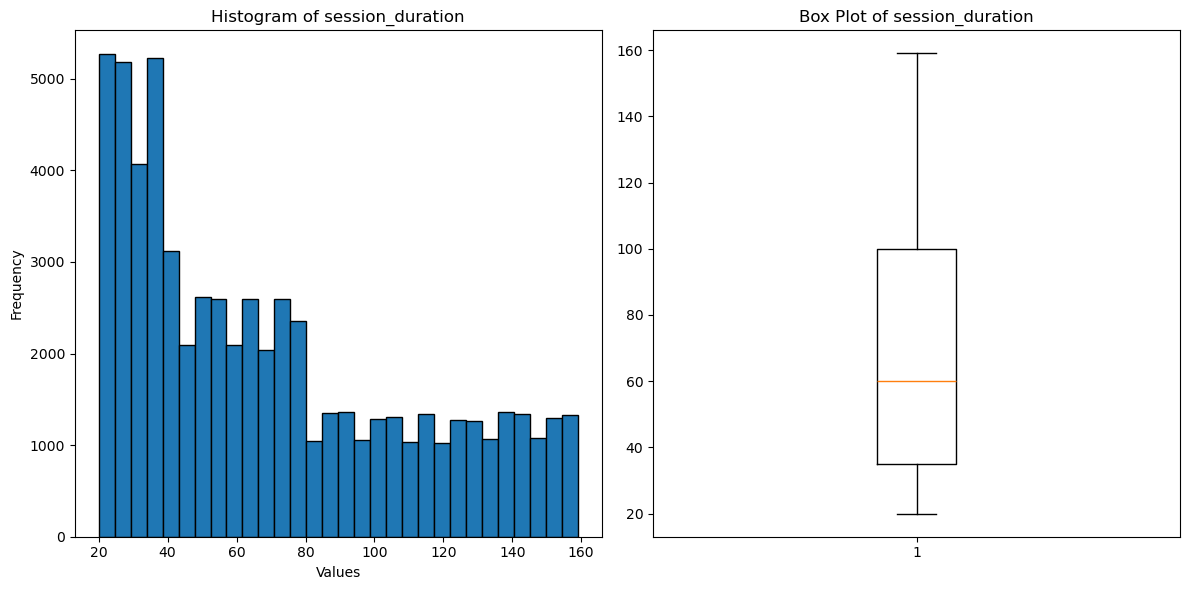

Skewness of purchase_pattern: -0.002574077748394709


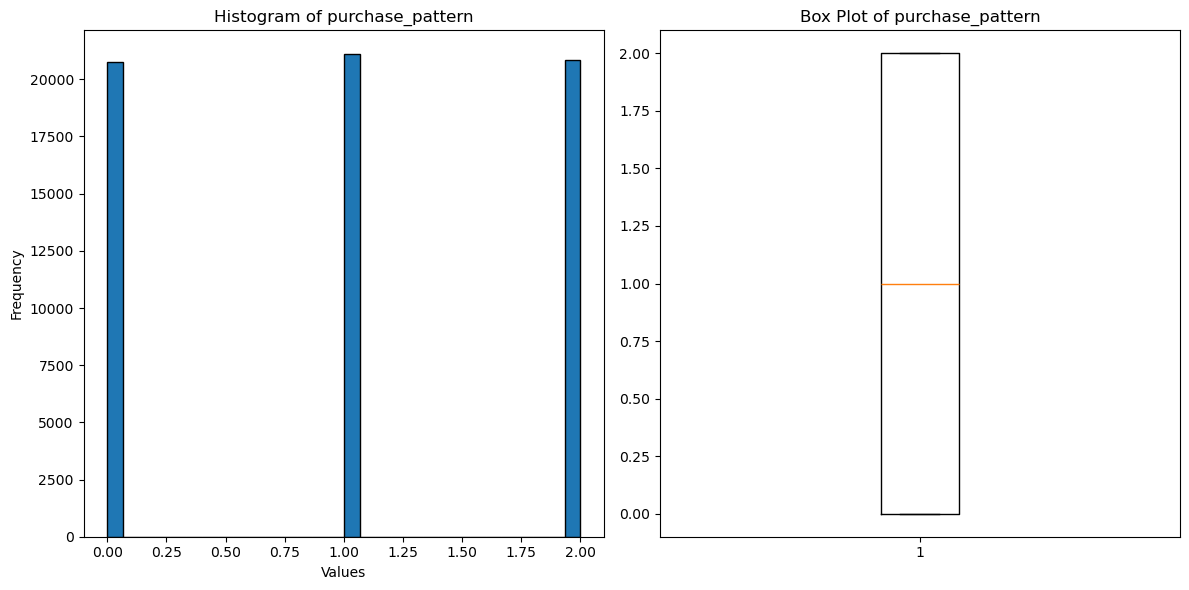

Skewness of age_group: -0.002574077748394709


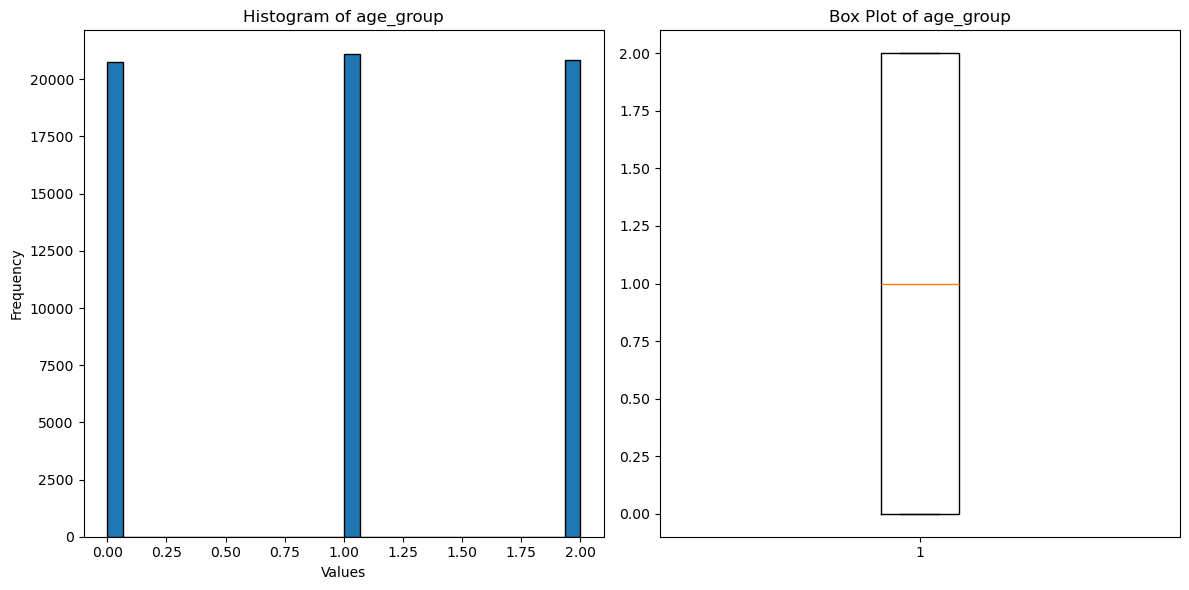

In [115]:
import matplotlib.pyplot as plt
from scipy.stats import skew

# List of columns to analyze
columns = df.columns[:9]  # Assuming you want to analyze the first 9 columns

# Plotting histograms and box plots for each column
for column in columns:
    # Calculate skewness
    skewness = skew(df[column])
    print(f'Skewness of {column}: {skewness}')

    # Plot histogram
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    
    # Plot box plot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    
    # Show plots
    plt.tight_layout()
    plt.show()
